In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
data = pd.read_csv(r"food_coded.csv")


In [111]:
features = data[['cook','eating_out','employment','ethnic_food','exercise','fav_cuisine_coded','fruit_day','income','on_off_campus','sports','pay_meal_out','veggies_day']]
features.head()

,cook,eating_out,employment,ethnic_food,exercise,fav_cuisine_coded,fruit_day,income,on_off_campus,sports,pay_meal_out,veggies_day
0,2.0,3,3.0,1,1.0,3,5,5.0,1.0,1.0,2,5
1,3.0,2,2.0,4,1.0,1,4,4.0,1.0,1.0,4,4
2,1.0,2,3.0,5,2.0,1,5,6.0,2.0,2.0,3,5
3,2.0,2,3.0,5,3.0,3,4,6.0,1.0,2.0,2,3
4,1.0,2,2.0,4,1.0,1,4,6.0,1.0,1.0,4,4


# CLEANING THE DATASET

In [112]:
#checking whether there are any duplicates
duplicates = features[features.duplicated()]
duplicates
#from the output, it is clear that there are no duplicate rows

,cook,eating_out,employment,ethnic_food,exercise,fav_cuisine_coded,fruit_day,income,on_off_campus,sports,pay_meal_out,veggies_day


In [113]:
#checking for null and missing values
#notnull method returns a dataframe of boolean values
#True --> No null values. False --> null values are there
check_na = features.dropna(axis=0, how='any')
print('There are' ,(len(features) - len(check_na)), 'rows with atleast one column value having a null value.')

There are 25 rows with atleast one column value having a null value.


In [114]:
#Let us remove the null values from the original dataset
features.dropna(axis=0, how='any', inplace=True)
len(features)

100

# VISUALIZING THE DATASET

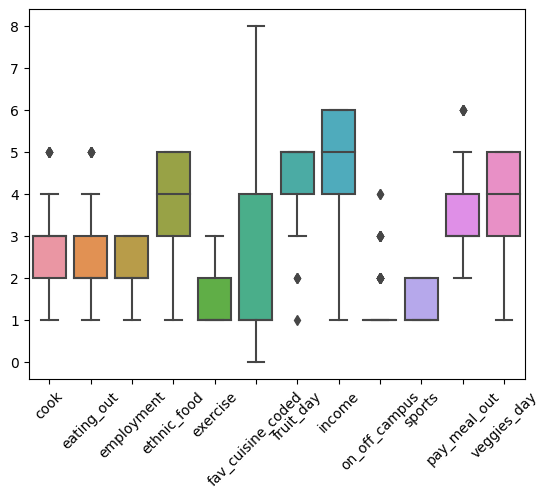

In [115]:
#plotting the dataset in the form of a boxplot
ax=sns.boxplot(data=features)
ax.set_xticklabels(features,rotation=45)
plt.show()

# BUILDING THE KMEANS MODEL FOR THE CODEBOOK DATASET

In [116]:
from sklearn.cluster import KMeans

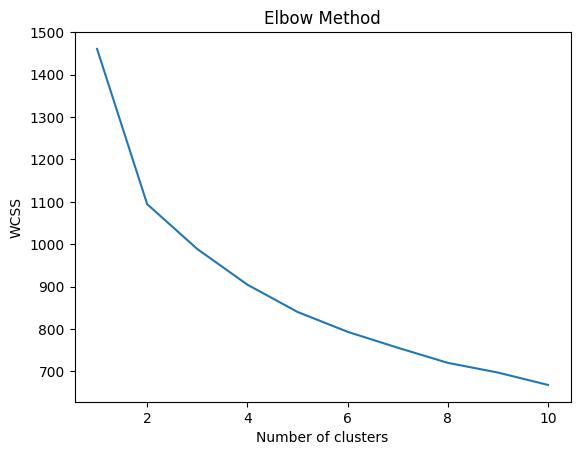

In [117]:
wcss = []
for i in range(1,11):
    Classifier = KMeans(n_clusters=i)
    Classifier.fit(features)
    wcss.append(Classifier.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the Graph, it seems K=8 might be optimal

In [118]:
Classifier = KMeans(n_clusters=6).fit(features)
y_pred = Classifier.fit_predict(features)

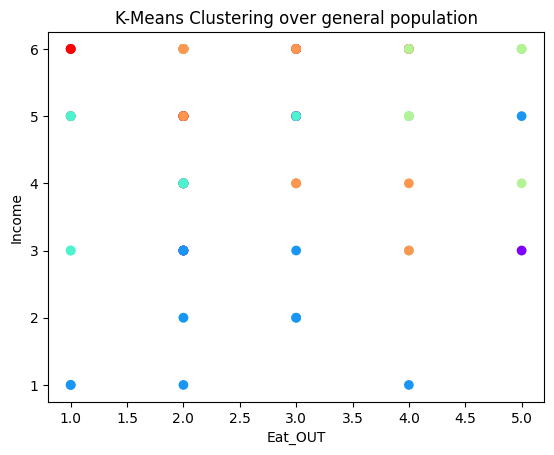

In [119]:
plt.scatter(features['eating_out'], features['income'], c=y_pred, cmap='rainbow')
plt.title('K-Means Clustering over general population')
plt.ylabel('Income')
plt.xlabel('Eat_OUT')
plt.show()

In [120]:
import json  
import pandas as pd  
from pandas.io.json import json_normalize  
import requests
from tabulate import tabulate
from sklearn.cluster import KMeans
import random
import numpy as np
import pandas as pd
import folium
import warnings
warnings.filterwarnings('ignore')
import os
os.environ.keys()

KeysView(environ({'ACSETUPSVCPORT': '23210', 'ACSVCPORT': '17532', 'ALLUSERSPROFILE': 'C:\\ProgramData', 'APPDATA': 'C:\\Users\\RAVI\\AppData\\Roaming', 'APPLICATION_INSIGHTS_NO_DIAGNOSTIC_CHANNEL': '1', 'CHROME_CRASHPAD_PIPE_NAME': '\\\\.\\pipe\\LOCAL\\crashpad_16064_BPHSFKBUWNVHQDHR', 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files', 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files', 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files', 'COMPUTERNAME': 'RAVI01', 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe', 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData', 'ELECTRON_RUN_AS_NODE': '1', 'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer', 'FPS_BROWSER_USER_PROFILE_STRING': 'Default', 'HOMEDRIVE': 'C:', 'HOMEPATH': '\\Users\\RAVI', 'JPY_INTERRUPT_EVENT': '2352', 'LOCALAPPDATA': 'C:\\Users\\RAVI\\AppData\\Local', 'LOGONSERVER': '\\\\RAVI01', 'NUMBER_OF_PROCESSORS': '8', 'ONEDRIVE': 'C:\\Users\\RAVI\\OneDrive', 'ORIGINAL_XDG_CURRENT_DESKTOP': 'undefin

In [121]:

url = 'https://discover.search.hereapi.com/v1/discover?in=circle:17.320486,76.839752;r=10000&q=medical college&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'
data = requests.get(url).json()
d=json_normalize(data['items'])
d.to_csv('api-data/bookstore.csv')
d 

,title,id,language,resultType,access,distance,categories,references,address.label,address.countryCode,address.countryName,address.stateCode,address.state,address.county,address.city,address.district,address.postalCode,position.lat,position.lng,address.subdistrict
0,Mahadeppe Rampur Medical College,here:pds:place:356tends-27a1e6553fd54c2da243cd...,en-GB,place,"[{'lat': 17.31923, 'lng': 76.83978}]",146,"[{'id': '800-8200-0173', 'name': 'Higher Educa...","[{'supplier': {'id': 'core'}, 'id': '105910331...","Mahadeppe Rampur Medical College, Shambhognlli...",IND,India,KA,Karnataka,Kalaburagi,Kalaburagi,Shambhognlli,585106,17.31918,76.83961,NaN
1,Para Medical College,here:pds:place:356tends-6bd5d5d2d8a44ce7826ae8...,en-GB,place,"[{'lat': 17.32007, 'lng': 76.85981}]",2137,"[{'id': '800-8200-0173', 'name': 'Higher Educa...","[{'supplier': {'id': 'core'}, 'id': '105910575...","Para Medical College, Tilak Nagar, Kusnoor, Ka...",IND,India,KA,Karnataka,Kalaburagi,Kalaburagi,Kusnoor,585106,17.32021,76.85988,Tilak Nagar
2,Para Medical College,here:pds:place:356tendt-2523aca7685c44ee9bbb24...,en-GB,place,"[{'lat': 17.32399, 'lng': 76.86466}]",2665,"[{'id': '800-8200-0173', 'name': 'Higher Educa...","[{'supplier': {'id': 'core'}, 'id': '108374520...","Para Medical College, Tilak Nagar, Kusnoor, Ka...",IND,India,KA,Karnataka,Kalaburagi,Kalaburagi,Kusnoor,585106,17.32401,76.86458,Tilak Nagar


In [122]:
d.columns

Index(['title', 'id', 'language', 'resultType', 'access', 'distance',
       'categories', 'references', 'address.label', 'address.countryCode',
       'address.countryName', 'address.stateCode', 'address.state',
       'address.county', 'address.city', 'address.district',
       'address.postalCode', 'position.lat', 'position.lng',
       'address.subdistrict'],
      dtype='object')

In [123]:
#Cleaning API data
d2=d[['title','address.label','distance','access','position.lat','position.lng','address.postalCode','id']]
d2.to_csv('api-data/cleaned_apartment.csv')
d2

,title,address.label,distance,access,position.lat,position.lng,address.postalCode,id
0,Mahadeppe Rampur Medical College,"Mahadeppe Rampur Medical College, Shambhognlli...",146,"[{'lat': 17.31923, 'lng': 76.83978}]",17.31918,76.83961,585106,here:pds:place:356tends-27a1e6553fd54c2da243cd...
1,Para Medical College,"Para Medical College, Tilak Nagar, Kusnoor, Ka...",2137,"[{'lat': 17.32007, 'lng': 76.85981}]",17.32021,76.85988,585106,here:pds:place:356tends-6bd5d5d2d8a44ce7826ae8...
2,Para Medical College,"Para Medical College, Tilak Nagar, Kusnoor, Ka...",2665,"[{'lat': 17.32399, 'lng': 76.86466}]",17.32401,76.86458,585106,here:pds:place:356tendt-2523aca7685c44ee9bbb24...


In [124]:

df_final=d2[['position.lat','position.lng']]

librayList=[]
latitudes = list(d2['position.lat'])
longitudes = list( d2['position.lng'])
for lat, lng in zip(latitudes, longitudes):    
    radius = '500040' #Set the radius to 1000 metres
    latitude=lat
    longitude=lng
    
	
    search_query = 'bookstore' #Search for any libray
    url = 'https://discover.search.hereapi.com/v1/discover?in=circle:{},{};r={}&q={}&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'.format(latitude, longitude, radius, search_query)
    results = requests.get(url).json()
    venues=json_normalize(results['items'])
    librayList.append(venues['title'].count())



df_final['bookstore'] = librayList

df_final

,position.lat,position.lng,bookstore
0,17.31918,76.83961,20
1,17.32021,76.85988,20
2,17.32401,76.86458,20


In [125]:
#Run K-means clustering on dataframe
kclusters = 1

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_final)
df_final['Cluster']=kmeans.labels_
df_final['Cluster']=df_final['Cluster'].apply(str)
df_final

,position.lat,position.lng,bookstore,Cluster
0,17.31918,76.83961,20,0
1,17.32021,76.85988,20,0
2,17.32401,76.86458,20,0


In [126]:
#Plotting clustered locations on map using Folium

#define coordinates of the college
map_bom=folium.Map(location=[17.320486,76.839752],zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'red'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'

latitudes = list(df_final['position.lat'])
longitudes = list(df_final['position.lng'])
labels = list(df_final['Cluster'])
names=list(d2['title'])
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=30,
            color=color_producer(label)
        ).add_to(map_bom)

# add locations to map
map_bom.add_child(locations)
folium.Marker([17.320486,76.839752],popup='CURRENT CO-ORDINATE',zoom_start=50).add_to(map_bom)

In [127]:
#saving the map 
map_bom.save("map/bookstore.html")